<a href="https://colab.research.google.com/github/skywalker0803r/c620/blob/main/notebook/experiment/Modeling_C670_Hyperparameter_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import joblib
from google.colab import drive
drive.mount('/content/drive')
!pip install autorch > log.txt
import autorch
import torch
torch.manual_seed(11)

Mounted at /content/drive


In [2]:
c = joblib.load('/content/drive/MyDrive/台塑輕油案子/data/c620/col_names/c670_col_names.pkl')
c.keys()

dict_keys(['xTray43', 'xTray54', 'combined', 'upper_bf', 'lower_bf', 'yRefluxRate', 'yControl', 'yHeatDuty', 'distillate_x', 'bottoms_x', 'distillate_sf', 'bottoms_sf', 'density'])

In [3]:
c670_df = pd.read_csv('/content/drive/MyDrive/台塑輕油案子/data/c620/cleaned/c670_train.csv',index_col=0).dropna(axis=0)
c670_df.head(3)

,Combined Feed to Toluene Column C670 @ Tray 43_Flow Rate_Volume Flow Rate_m3/hr,Combined Feed to Toluene Column C670 @ Tray 43_Flow Rate_Mass Flow Rate_ton/hr,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Hydrogen_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Methane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Ethane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Propane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Butane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Pentane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Hexane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Benzene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Cyclohexane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Heptane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Water_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Methylcyclohexane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Toluene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Octane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Propylcyclopentane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Ethylcyclohexane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Ethylbenzene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_p-Xylene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_m-Xylene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_o-Xylene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Nonane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_i-Propylbenzene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Propylcyclohexane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Propylbenzene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1-Methyl-3-ethylbenzene_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1-Methyl-4-ethylbenzene_wt%,"Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,3,5-Trimethylbenzene_wt%",Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1-Methyl-2-ethylbenzene_wt%,"Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,2,4-Trimethylbenzene_wt%",Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_tert-Butylcyclohexane_wt%,"Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,2,3-Trimethylbenzene_wt%",Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_Indane_wt%,Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1-Methyl-4-n-propylbenzene_wt%,"Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,2-Diethylbenzene_wt%",Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_5-Ethyl-m-xylene_wt%,"Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,4-Diethylbenzene_wt%","Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_1,2,3,5-Tetramethylbenzene_wt%",Combined Feed to Toluene Column C670 @ Tray 43_Detailed Composition_n-Pentylbenzene_wt%,...,Toluene Column C670 Feed Blending Factors Calculation_Lower Feed Blending Factor @ Tray 54 for Individual Component to Toluene Column C670_Propane_Fraction,Toluene Column C670 Feed Blending Factors Calculation_Lower Feed Blending Factor @ Tray 54 for Individual Component to Toluene Column C670_n-Butane_Fraction,Toluene Column C670 Feed Blending Factors Calculation_Lower Feed Blending Factor @ Tray 54 for Individual Component to Toluene Column C670_n-Pentane_Fraction,Toluene Column C670 Feed Blending Factors Calculatio

# 欄位定義

由於 upper + lower 一定等於 1 所以知道upper就可以知道lower

In [4]:
np.allclose(c670_df[c['upper_bf']].values+c670_df[c['lower_bf']].values,1.0)

True

In [5]:
# 根據條件修改值
a = c670_df[c['upper_bf']+c['lower_bf']]
紫色零點零欄位 = a[a==0.0].dropna(axis=1).columns.tolist()
紫色零點一欄位 = a[a==0.1].dropna(axis=1).columns.tolist()
紫色零點九欄位 = a[a==0.9].dropna(axis=1).columns.tolist()
紫色一點零欄位 = a[a==1.0].dropna(axis=1).columns.tolist()
print('修改欄位數量:',len(紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位))
c670_df.loc[:,紫色零點零欄位] = 0.0001 
c670_df.loc[:,紫色零點一欄位] = 0.0001 
c670_df.loc[:,紫色零點九欄位] = 0.9999
c670_df.loc[:,紫色一點零欄位] = 0.9999
c670_df[紫色零點零欄位+紫色零點一欄位+紫色零點九欄位+紫色一點零欄位].head()

# 確認質量平衡
print(np.allclose(c670_df[c['upper_bf']].values+c670_df[c['lower_bf']].values,1.0))


修改欄位數量: 24
True


In [6]:
x_col = c['combined'] + c['upper_bf']# + c['lower_bf']
s_col = c['distillate_sf']+c['bottoms_sf']
wt_col = c['distillate_x']+c['bottoms_x']
op_col = c['density']+c['yRefluxRate']+c['yHeatDuty']+c['yControl']
y_col = s_col + op_col
len(x_col),len(y_col)

(82, 89)

In [7]:
c670_df.loc[['001-002', '001-005', '001-008', '001-011', '001-014'],
            x_col+y_col].to_excel('/content/drive/MyDrive/台塑輕油案子/data/c620/Data_format_example/c670_data.xlsx')

In [8]:
n_idx = [[i,i+41] for i in range(41)]
for idx in n_idx:
  assert np.allclose(c670_df[y_col].iloc[:,idx].sum(axis=1).mean(),1.0)

# train

  1%|          | 1/150 [00:01<02:31,  1.02s/it]

epoch:0 train_loss:0.0158 valid_loss:0.0038


 34%|███▍      | 51/150 [00:34<01:07,  1.46it/s]

epoch:50 train_loss:0.0020 valid_loss:0.0021


 67%|██████▋   | 101/150 [01:06<00:32,  1.50it/s]

epoch:100 train_loss:0.0019 valid_loss:0.0019


100%|██████████| 150/150 [01:38<00:00,  1.52it/s]


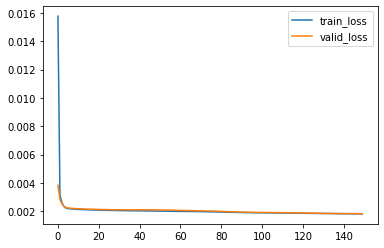

  0%|          | 0/150 [00:00<?, ?it/s]

         64   128  256
2  0.0299905  NaN  NaN
3        NaN  NaN  NaN
4        NaN  NaN  NaN


  1%|          | 1/150 [00:00<01:40,  1.48it/s]

epoch:0 train_loss:0.0117 valid_loss:0.0031


 34%|███▍      | 51/150 [00:32<01:07,  1.47it/s]

epoch:50 train_loss:0.0019 valid_loss:0.0020


 67%|██████▋   | 101/150 [01:03<00:30,  1.63it/s]

epoch:100 train_loss:0.0017 valid_loss:0.0019


100%|██████████| 150/150 [01:35<00:00,  1.58it/s]


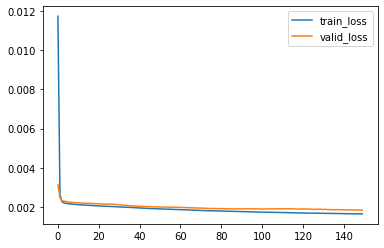

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128  256
2  0.0299905  0.218815  NaN
3        NaN       NaN  NaN
4        NaN       NaN  NaN


  1%|          | 1/150 [00:00<01:55,  1.29it/s]

epoch:0 train_loss:0.0084 valid_loss:0.0025


 34%|███▍      | 51/150 [00:32<01:04,  1.53it/s]

epoch:50 train_loss:0.0018 valid_loss:0.0017


 67%|██████▋   | 101/150 [01:05<00:30,  1.60it/s]

epoch:100 train_loss:0.0016 valid_loss:0.0016


100%|██████████| 150/150 [01:36<00:00,  1.55it/s]


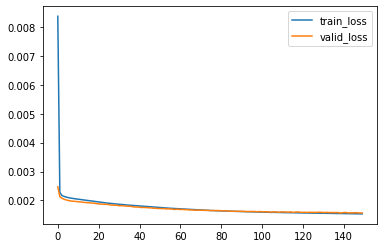

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128        256
2  0.0299905  0.218815  0.0451385
3        NaN       NaN        NaN
4        NaN       NaN        NaN


  1%|          | 1/150 [00:00<01:42,  1.45it/s]

epoch:0 train_loss:0.0172 valid_loss:0.0040


 34%|███▍      | 51/150 [00:35<01:07,  1.47it/s]

epoch:50 train_loss:0.0020 valid_loss:0.0020


 67%|██████▋   | 101/150 [01:12<00:35,  1.36it/s]

epoch:100 train_loss:0.0018 valid_loss:0.0018


100%|██████████| 150/150 [01:48<00:00,  1.38it/s]


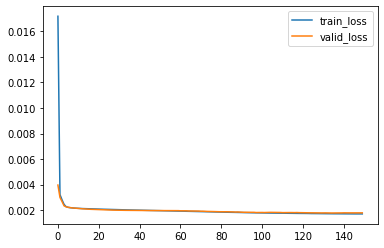

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128        256
2  0.0299905  0.218815  0.0451385
3   0.105919       NaN        NaN
4        NaN       NaN        NaN


  1%|          | 1/150 [00:00<01:50,  1.34it/s]

epoch:0 train_loss:0.0126 valid_loss:0.0029


 34%|███▍      | 51/150 [00:37<01:12,  1.37it/s]

epoch:50 train_loss:0.0018 valid_loss:0.0018


 67%|██████▋   | 101/150 [01:12<00:34,  1.43it/s]

epoch:100 train_loss:0.0016 valid_loss:0.0017


100%|██████████| 150/150 [01:48<00:00,  1.38it/s]


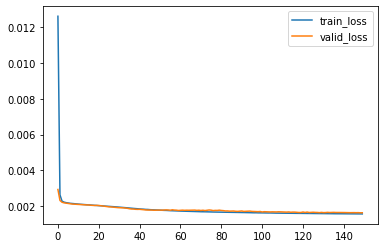

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128        256
2  0.0299905  0.218815  0.0451385
3   0.105919  0.182859        NaN
4        NaN       NaN        NaN


  1%|          | 1/150 [00:00<01:42,  1.46it/s]

epoch:0 train_loss:0.0089 valid_loss:0.0027


 34%|███▍      | 51/150 [00:37<01:17,  1.27it/s]

epoch:50 train_loss:0.0016 valid_loss:0.0017


 67%|██████▋   | 101/150 [01:12<00:35,  1.39it/s]

epoch:100 train_loss:0.0015 valid_loss:0.0016


100%|██████████| 150/150 [01:47<00:00,  1.39it/s]


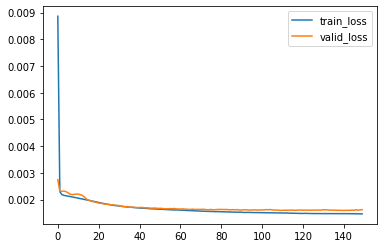

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128        256
2  0.0299905  0.218815  0.0451385
3   0.105919  0.182859  0.0728543
4        NaN       NaN        NaN


  1%|          | 1/150 [00:00<02:00,  1.24it/s]

epoch:0 train_loss:0.0189 valid_loss:0.0043


 34%|███▍      | 51/150 [00:39<01:16,  1.29it/s]

epoch:50 train_loss:0.0019 valid_loss:0.0021


 67%|██████▋   | 101/150 [01:18<00:38,  1.26it/s]

epoch:100 train_loss:0.0018 valid_loss:0.0018


100%|██████████| 150/150 [01:58<00:00,  1.27it/s]


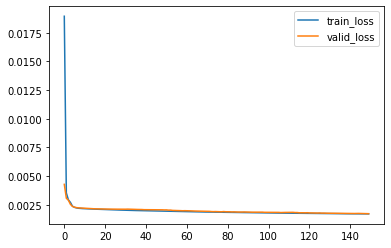

  0%|          | 0/150 [00:00<?, ?it/s]

         64        128        256
2  0.0299905  0.218815  0.0451385
3   0.105919  0.182859  0.0728543
4  0.0439943       NaN        NaN


  1%|          | 1/150 [00:00<01:57,  1.27it/s]

epoch:0 train_loss:0.0145 valid_loss:0.0034


 34%|███▍      | 51/150 [00:39<01:14,  1.34it/s]

epoch:50 train_loss:0.0017 valid_loss:0.0018


 67%|██████▋   | 101/150 [01:18<00:36,  1.33it/s]

epoch:100 train_loss:0.0016 valid_loss:0.0017


100%|██████████| 150/150 [01:56<00:00,  1.29it/s]


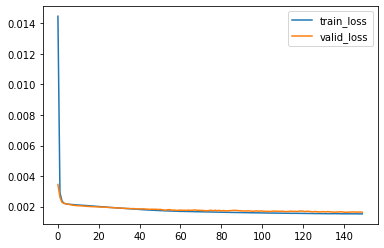

  0%|          | 0/150 [00:00<?, ?it/s]

         64         128        256
2  0.0299905   0.218815  0.0451385
3   0.105919   0.182859  0.0728543
4  0.0439943  0.0525427        NaN


  1%|          | 1/150 [00:00<02:02,  1.22it/s]

epoch:0 train_loss:0.0106 valid_loss:0.0031


 34%|███▍      | 51/150 [00:40<01:22,  1.20it/s]

epoch:50 train_loss:0.0016 valid_loss:0.0017


 67%|██████▋   | 101/150 [01:19<00:40,  1.21it/s]

epoch:100 train_loss:0.0015 valid_loss:0.0016


100%|██████████| 150/150 [01:57<00:00,  1.28it/s]


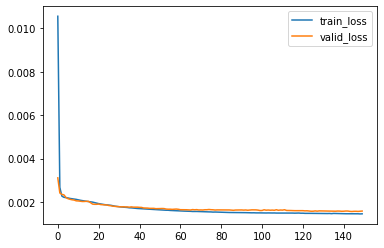

         64         128        256
2  0.0299905   0.218815  0.0451385
3   0.105919   0.182859  0.0728543
4  0.0439943  0.0525427  0.0519457


In [9]:
from autorch.utils import PartBulider
from torch import nn
from torch.optim import Adam


table = pd.DataFrame(index=[2,3,4],columns=[64,128,256])
for m in [2,3,4]:
  for n in [64,128,256]:
    c670 = PartBulider(c670_df,x_col,y_col,normalize_idx_list=n_idx,limit_y_range=True,device='cuda:0',max_epochs=150)
    modules = []
    modules.append(nn.Sequential(nn.Linear(len(x_col),n),nn.ReLU()))
    for i in range(m-1):
      modules.append(nn.Sequential(nn.Linear(n,n),nn.ReLU()))
    modules.append(nn.Sequential(nn.Linear(n,len(y_col),nn.Sigmoid())))
    c670.net = nn.Sequential(*modules).cuda()
    c670.optimizer = Adam(c670.net.parameters())
    c670.train()
    table.loc[m,n] = c670.test(e=0.02).loc['AVG','MSE']
    print(table)

In [10]:
table

,64,128,256
2,0.0299905,0.218815,0.0451385
3,0.105919,0.182859,0.0728543
4,0.0439943,0.0525427,0.0519457


In [ ]:
res = c670.test(e=0.02).loc[op_col,:]
res.loc['AVG'] = res.mean(axis=0)
res

,R2,MSE,MAPE
Density_Distillate Production Rate and Composition,0.997788,1.75183e-12,0.000117133
Density_Bottoms Production Rate and Composition,0.999251,1.38256e-10,0.00102332
Toluene Column C670 Operation_Yield \nSummary_Reflux Rate_m3/hr,0.995589,2.63309,0.503695
Toluene Column C670 Operation_Heat Duty_Condenser Heat Duty_Mkcal/hr,0.995739,0.0361005,0.522549
Toluene Column C670 Operation_Heat Duty_Reboiler Heat Duty_Mkcal/hr,0.995494,0.0364076,0.518755
Toluene Column C670 Operation_Column Temp Profile_C670 Tray 24 (Control)_oC,0.996362,0.000212789,0.00633128
Toluene Column C670 Operation_Column Temp Profile_C670 Btm Temp (Control)_oC,0.998711,0.00353063,0.0212867
AVG,0.996991,0.387049,0.224822


# wt預測結果 

In [ ]:
from autorch.function import sp2wt

x_test = c670.data['X_test']
x41 = x_test[c['combined']].values
sp = c670.predict(x_test).iloc[:,:41*2]
s1,s2 = sp.iloc[:,:41].values,sp.iloc[:,41:41*2].values
w1,w2 = sp2wt(x41,s1),sp2wt(x41,s2)
wt_pred = np.hstack((w1,w2))
wt_pred = pd.DataFrame(wt_pred,index=x_test.index,columns=wt_col)
wt_pred.head(3)

,Toluene Column C670 Operation_Distillate Production Rate and Composition_Hydrogen_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Methane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Propane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Butane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Pentane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Hexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Benzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Heptane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Water_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Toluene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Octane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_p-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_m-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_o-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Nonane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_Indane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2-Diethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_5-Ethyl-m-xylene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,4-Diethylbenzene_wt%","Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,3,5-Tetramethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Pentylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Hexylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Nitrogen_wt%,...,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Methane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Ethane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Propane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition

In [ ]:
wt_real = c670_df.loc[x_test.index,wt_col]
wt_real.head(3)

,Toluene Column C670 Operation_Distillate Production Rate and Composition_Hydrogen_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Methane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Propane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Butane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Pentane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Hexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Benzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Cyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Heptane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Water_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Methylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Toluene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Octane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylcyclopentane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_p-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_m-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_o-Xylene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Nonane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_i-Propylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylcyclohexane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Propylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-3-ethylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-4-ethylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,3,5-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-2-ethylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,4-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_tert-Butylcyclohexane_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,3-Trimethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_Indane_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_1-Methyl-4-n-propylbenzene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2-Diethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_5-Ethyl-m-xylene_wt%,"Toluene Column C670 Operation_Distillate Production Rate and Composition_1,4-Diethylbenzene_wt%","Toluene Column C670 Operation_Distillate Production Rate and Composition_1,2,3,5-Tetramethylbenzene_wt%",Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Pentylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Hexylbenzene_wt%,Toluene Column C670 Operation_Distillate Production Rate and Composition_Nitrogen_wt%,...,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Methane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Ethane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition_Propane_wt%,Toluene Column C670 Operation_Bottoms Production Rate and Composition

In [ ]:
res = c670.show_metrics(wt_real,wt_pred,e=0.02).fillna(0)
res

,R2,MSE,MAPE
Toluene Column C670 Operation_Distillate Production Rate and Composition_Hydrogen_wt%,1.000000,0.000000e+00,0.000000
Toluene Column C670 Operation_Distillate Production Rate and Composition_Methane_wt%,1.000000,0.000000e+00,0.000000
Toluene Column C670 Operation_Distillate Production Rate and Composition_Ethane_wt%,1.000000,0.000000e+00,0.000000
Toluene Column C670 Operation_Distillate Production Rate and Composition_Propane_wt%,1.000000,0.000000e+00,0.000000
Toluene Column C670 Operation_Distillate Production Rate and Composition_n-Butane_wt%,1.000000,0.000000e+00,0.000000
...,...,...,...
Toluene Column C670 Operation_Bottoms Production Rate and Composition_n-Pentylbenzene_wt%,1.000000,9.121183e-10,0.001937
Toluene Column C670 Operation_Bottoms Production Rate and Composition_n-Hexylbenzene_wt%,1.000000,1.893225e-10,0.001966
Toluene Column C670 Operation_Bottoms Production Rate and Composition_Nitrogen_wt%,1.000000,0.000000e+00,0.000000
Toluene Column C670 Operation_Bottoms Production Rate and Composition_Oxygen_wt%,1.000000,0.000000e+00,0.000000


In [ ]:
c670.shrink()

In [ ]:
joblib.dump(c670,'/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670.pkl')

['/content/drive/MyDrive/台塑輕油案子/data/c620/model/c670.pkl']